In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train,y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

In [9]:
X_train.shape

(60000, 28, 28)

In [15]:
X_train[4030][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [4]:
#scaling
X_train = X_train/255
X_test = X_test/255

In [5]:
#model analysis
call_1 = tf.keras.callbacks.TensorBoard(log_dir = "logs/adam", histogram_freq = 1)
call_2 = tf.keras.callbacks.TensorBoard(log_dir = "logs/SGD", histogram_freq = 1)

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid'),
])
model.compile(
    optimizer = 'SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train,y_train,epochs = 10,callbacks = [call_2])

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.6308 - accuracy: 0.8429
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3328 - accuracy: 0.9072
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2852 - accuracy: 0.9198
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2551 - accuracy: 0.9286
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2321 - accuracy: 0.9355
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2135 - accuracy: 0.9407
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1981 - accuracy: 0.9448
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1846 - accuracy: 0.9485
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1730 - accuracy: 0.9517
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.162

In [7]:
y_predicted = model.predict(X_test)
y_label = [np.argmax(i) for i in y_predicted]

313/313 [==============================] - 1s 2ms/step


<AxesSubplot:>

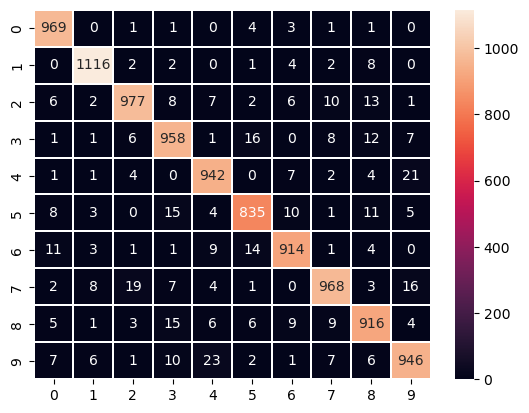

In [8]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_label)
sns.heatmap(cm,annot = True, linewidths=0.2,fmt=".0f")